In [9]:
!pip install -r requirements.txt

  Using cached cycler-0.11.0-py3-none-any.whl.metadata (785 bytes)
  Using cached fonttools-4.29.1-py3-none-any.whl.metadata (119 kB)
  Using cached joblib-1.1.0-py2.py3-none-any.whl.metadata (5.2 kB)
  Using cached kiwisolver-1.3.2.tar.gz (54 kB)
  Preparing metadata (setup.py) ... done
  Using cached matplotlib-3.5.1.tar.gz (35.3 MB)
  Preparing metadata (setup.py) ... done
  Using cached mlxtend-0.19.0-py2.py3-none-any.whl.metadata (1.6 kB)
  Using cached numpy-1.22.2.zip (11.4 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached packaging-21.3-py3-none-any.whl.metadata (15 kB)
  Using cached pandas-1.4.1.tar.gz (4.9 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached Pillow-9.0.1.tar.gz (49.5 MB)
  Preparing metadata (setup.py) ... done
  Using cached pyparsing-3.0.7-py3-none-any.wh

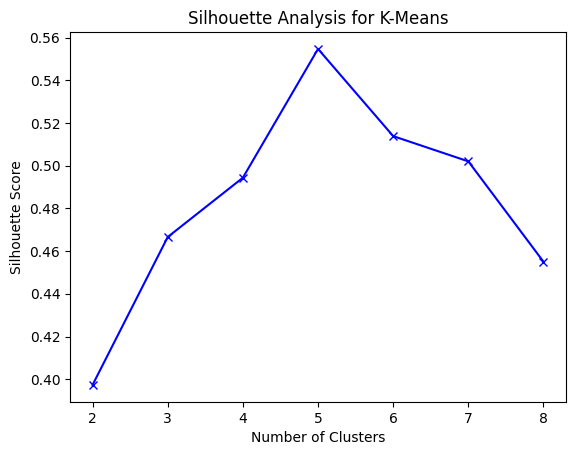

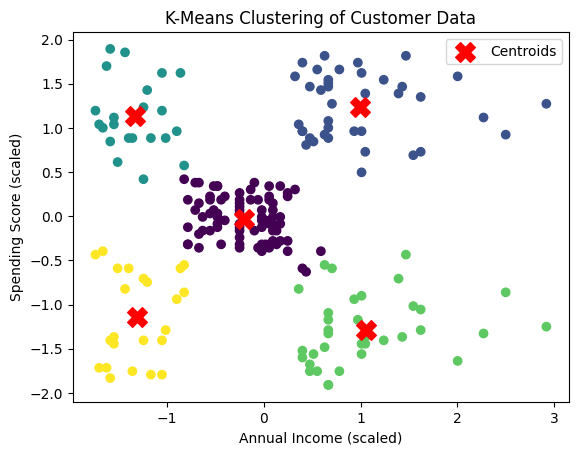

Silhouette Score for 5 clusters: 0.5546571631111091
Analysis: K-Means identified five customer segments, likely representing different spending behaviors based on income and spending score.


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score



# Load data
data = pd.read_csv('/content/Mall_Customers.csv')
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Find optimal number of clusters using silhouette score
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
silhouette_avg = []
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X_scaled)
    silhouette_avg.append(silhouette_score(X_scaled, cluster_labels))

# Plot silhouette scores
plt.plot(range_n_clusters, silhouette_avg, 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis for K-Means')
plt.savefig('kmeans_silhouette.png')
plt.show()

# Apply K-Means with optimal clusters (e.g., 5)
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
data['Cluster'] = clusters

# Visualize clusters
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.title('K-Means Clustering of Customer Data')
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.legend()
plt.savefig('kmeans_clusters.png')
plt.show()

# Print silhouette score and analysis
print(f'Silhouette Score for 5 clusters: {silhouette_score(X_scaled, clusters)}')
print('Analysis: K-Means identified five customer segments, likely representing different spending behaviors based on income and spending score.')